<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/L.2.%20modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [9]:
#Создание выборки случайных чисел
exp100 = np.random.exponential(scale=1, size=(100,))
exp1000 = np.random.exponential(scale=1, size=(1000,))
exp_scale = 1

norm100 = np.random.normal(loc=0, scale=1, size=(100,))
norm1000 = np.random.normal(loc=0, scale=1, size=(1000,))
norm_mean = 0
norm_std = 1

ars = {"exp100":exp100,"exp1000": exp1000, "norm100": norm100, "norm1000": norm1000}
print (exp100, '   ')
print (exp1000, '   ')
print (norm100, '   ')
print (norm1000, '   ')

[1.85748593 0.25145656 1.36389306 0.25118944 7.30293174 0.60334109
 0.07694665 1.21453597 2.18631564 0.13198857 0.05196604 0.62021979
 1.77515179 1.2538845  0.52193064 0.3587471  0.46022214 3.0783276
 1.14485158 0.06217255 1.7875288  0.2195304  0.04970178 1.50369493
 0.94716294 2.4180342  0.3813044  1.80741106 0.65479486 1.71758012
 0.17377381 1.59689823 3.46478486 0.38899376 0.52273175 0.27129929
 0.53585518 0.4108471  0.07586197 0.25541886 0.94872217 1.83006531
 0.02211018 0.10751087 1.22048376 0.02666936 1.45841981 3.03029674
 0.07636763 1.52282689 0.57357542 0.84351173 0.47660415 0.66206375
 0.68389326 2.34594439 0.3923053  0.84026272 1.47387435 1.41391342
 1.66577212 1.51218286 1.73443878 0.92534304 1.63063736 0.55685211
 0.47292214 0.13577523 2.613173   1.17141431 0.93136191 0.11657063
 0.87369521 0.25523921 0.86570483 0.0787686  0.27581497 1.79300982
 0.11794583 1.03648685 0.05216347 2.10734085 0.21114683 0.8154011
 0.32685986 0.73088076 0.18664529 1.73993345 1.40151231 0.079462

In [11]:
#Дисперсия и среднее значение
for i in ars:
    m = np.mean(ars[i])
    v = np.var(ars[i])
    if "exp" in i:
        print("mean: ", m, " | origin ", exp_scale)
        print("var", v, " | origin ", exp_scale)
    else:
        print("mean: ", m, " | origin ", norm_mean)
        print("var", v, " | origin ", norm_std)

mean:  1.0699567746987058  | origin  1
var 1.331563454556973  | origin  1
mean:  0.9927650572087907  | origin  1
var 0.9424035322382187  | origin  1
mean:  0.008680309343615678  | origin  0
var 0.8117814265629282  | origin  1
mean:  -0.034762188690927176  | origin  0
var 1.022586760017674  | origin  1


q05 0.7731409308311126  | origin  0.693147
q99 5.442724587832731  | origin  4.6
_____


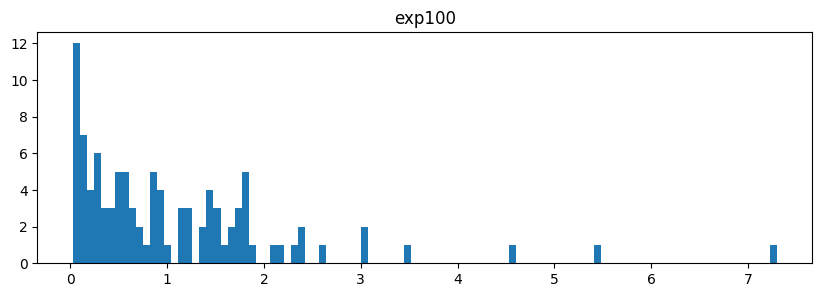

q05 0.6967387374894067  | origin  0.693147
q99 4.518003540073118  | origin  4.6
_____


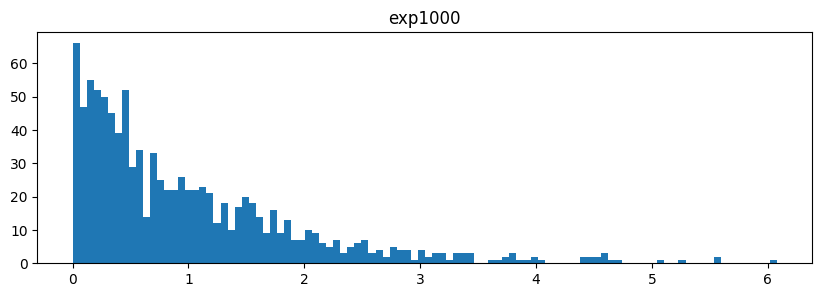

q05 0.06608314456880876  | origin  0
q99 1.732830144295266  | origin  2.3
_____


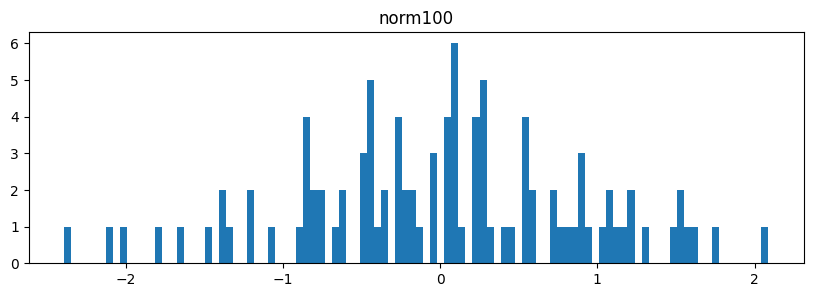

q05 -0.008594262897320598  | origin  0
q99 2.337988493297907  | origin  2.3
_____


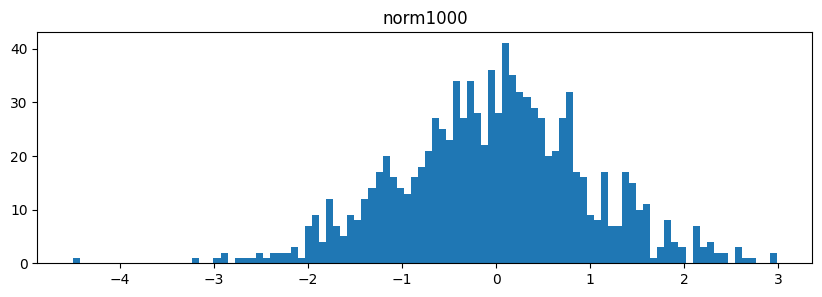

In [16]:
# 0.5 и 0.99 квантили
for i in ars:
    q05 = np.quantile(ars[i], q=0.5)
    q99 = np.quantile(ars[i], q=0.99)

    if "exp" in i:
        print("q05", q05, " | origin ", 0.693147)
        print("q99", q99, " | origin ", 4.6)
        print("_"*5)
    else:
        print("q05", q05, " | origin ", 0)
        print("q99", q99, " | origin ", 2.3)
        print("_"*5)

    #Uистограммs распределения
    plt.figure(figsize=(10,3))
    plt.hist(ars[i], bins=100)
    plt.title(i)
    plt.show()

In [17]:
def f_exp(l, x):
    return 1-np.exp(-l*x)

In [18]:
theory_exp_x = np.linspace(0,10,100)
theory_exp_y = f_exp(1, theory_exp_x)

In [19]:
exp100_s = sorted(np.copy(exp100))
exp1000_s = sorted(np.copy(exp1000))

In [20]:
exp100_y = np.arange(0.,1.,0.01)
exp1000_y = np.arange(0.,1.,0.001)

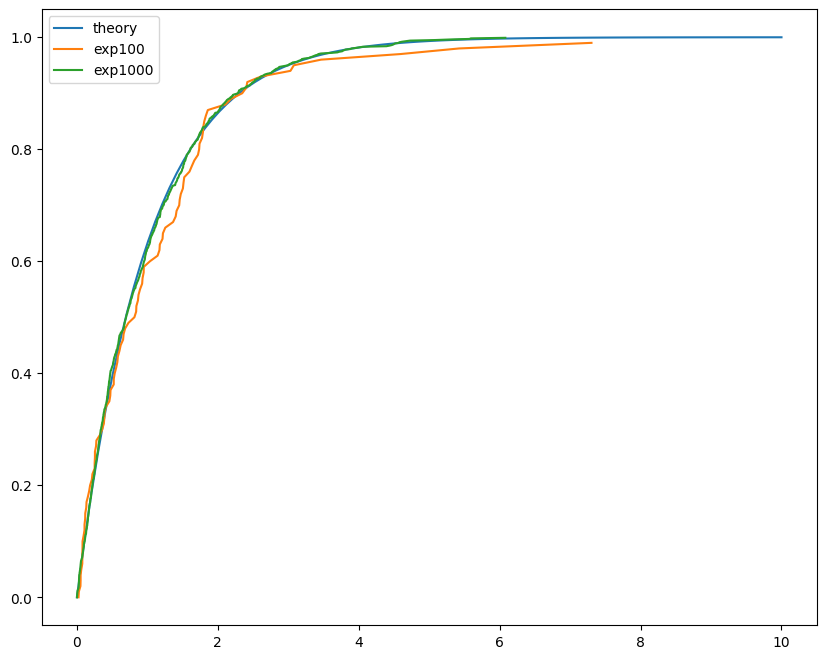

In [21]:
plt.figure(figsize=(10,8))
plt.plot(theory_exp_x, theory_exp_y, label="theory")
plt.plot(exp100_s, exp100_y, label="exp100")
plt.plot(exp1000_s, exp1000_y, label="exp1000")
plt.legend()

In [22]:
from math import erf

In [23]:
def f(x, m, s):
    return 0.5*(1+erf((x-m)/np.sqrt(2*s**2)))

In [24]:
theory_x_norm = np.linspace(-3,3,100)
theory_y_norm=[]
for i in theory_x_norm:
    theory_y_norm.append(f(i,0,1))

In [25]:
norm100_s = sorted(np.copy(norm100))
norm1000_s = sorted(np.copy(norm1000))

In [26]:
norm100_y = np.arange(0., 1., 0.01)
norm1000_y = np.arange(0., 1., 0.001)

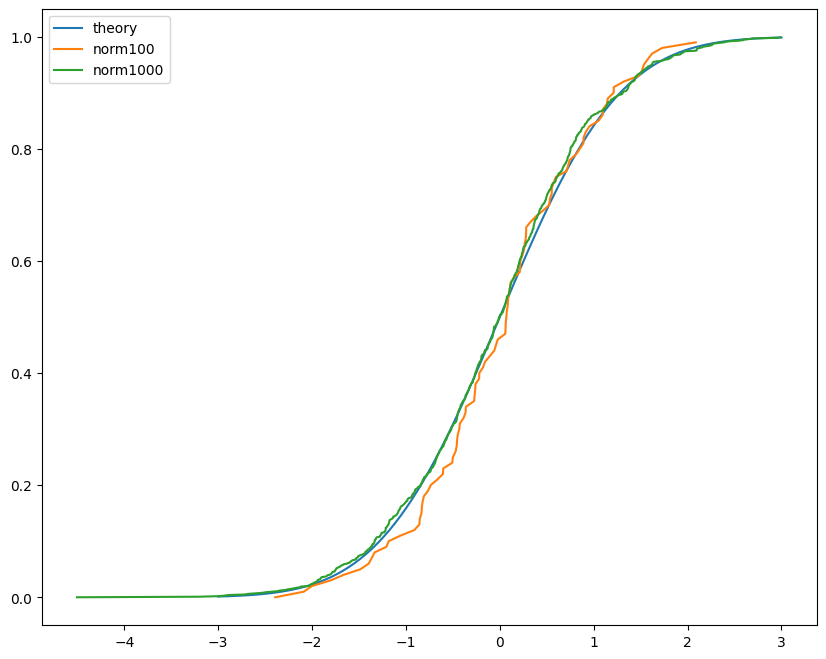

In [27]:
plt.figure(figsize=(10,8))

plt.plot(theory_x_norm, theory_y_norm, label="theory")
plt.plot(norm100_s, norm100_y, label="norm100")
plt.plot(norm1000_s, norm1000_y, label="norm1000")
plt.legend()

In [28]:
def exp_p(l, x):
    return l*np.exp(-l*x)

In [29]:
theory_exp_p_x = np.linspace(0,10,100)
theory_exp_p_y = exp_p(1, theory_exp_p_x)

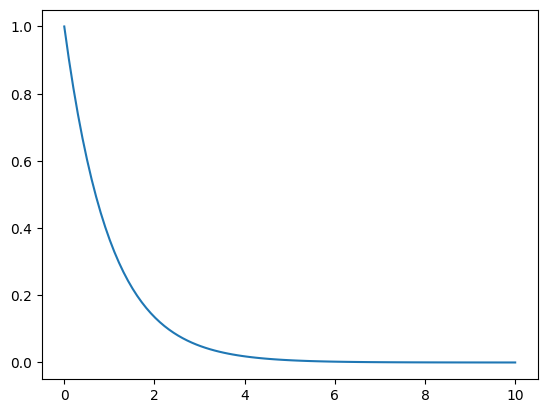

In [30]:
plt.plot(theory_exp_p_x, theory_exp_p_y)

In [31]:
def norm_p(x, m, s):
     return 1/(s*np.sqrt(2*np.pi))*np.exp(-0.5*((x-m)/s)**2)

In [32]:
theory_norm_p_x = np.linspace(-3, 3, 100)
theory_norm_p_y = norm_p(theory_norm_p_x, 0, 1)

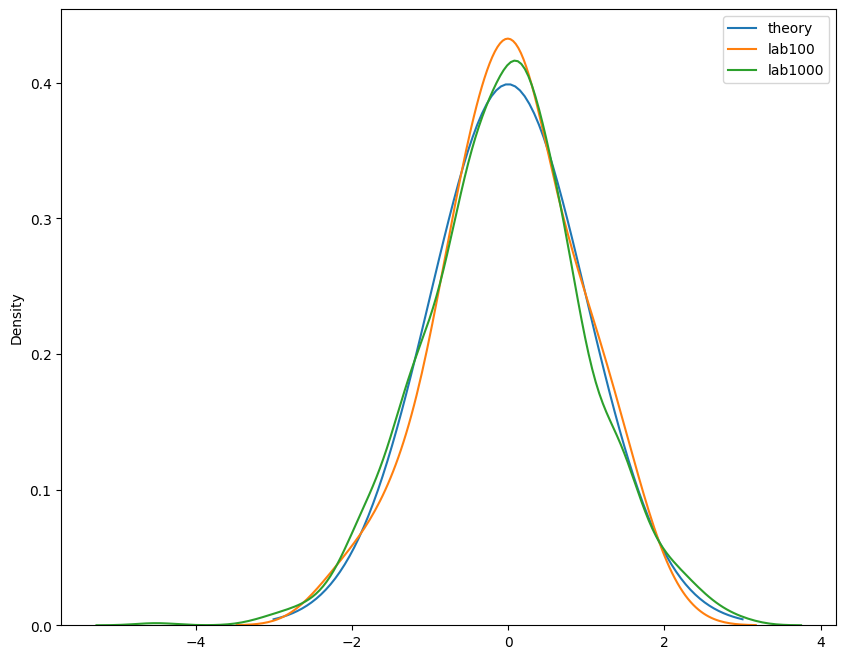

In [35]:
plt.figure(figsize=(10,8))

plt.plot(theory_norm_p_x, theory_norm_p_y, label="theory")
sns.kdeplot(norm100, label="lab100")
sns.kdeplot(norm1000, label="lab1000")
plt.legend()

In [37]:
a = 10
b = 30
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [38]:
def create_d(length):
    D = []
    for i in range(length):
        x1,x2 = np.random.uniform(0,a),np.random.uniform(0,a)
        y1,y2 = np.random.uniform(0,b),np.random.uniform(0,b)
        D.append(dist(x1,y1,x2,y2))
    D.sort()
    return D

In [39]:
l100 = create_d(100)
l1000 = create_d(1000)
l10000 = create_d(10000)

In [40]:
x100 = np.linspace(0, np.sqrt(a*a + b*b), 100)
x1000 = np.linspace(0, np.sqrt(a*a + b*b), 1000)
x10000 = np.linspace(0, np.sqrt(a*a + b*b), 10000)

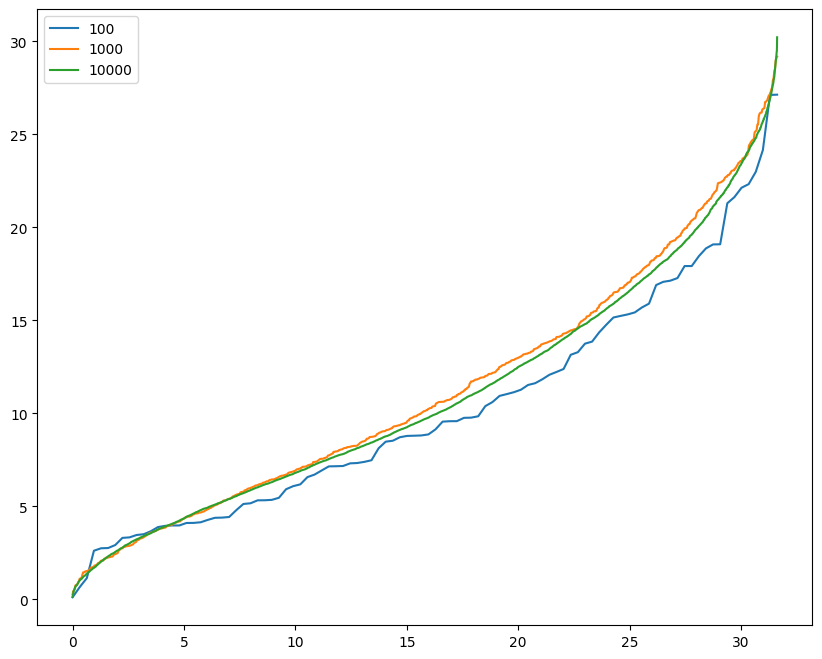

In [41]:
plt.figure(figsize=(10,8))

plt.plot(x100, l100, label="100")
plt.plot(x1000, l1000, label="1000")
plt.plot(x10000, l10000, label="10000")
plt.legend()

In [44]:
kde_dist_1_y = gaussian_kde(l100).evaluate(l100)
kde_dist_2_y = gaussian_kde(l1000).evaluate(l1000)
kde_dist_3_y = gaussian_kde(l10000).evaluate(l10000)

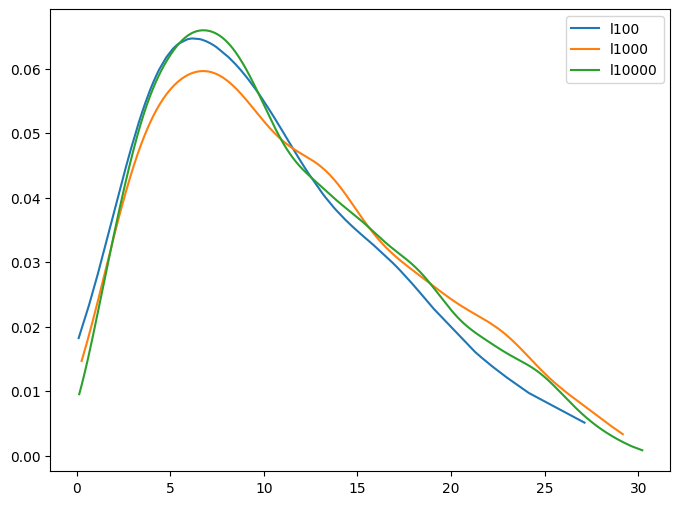

In [45]:
plt.figure(figsize=(8,6))

plt.plot(l100, kde_dist_1_y, label="l100")
plt.plot(l1000, kde_dist_2_y, label="l1000")
plt.plot(l10000, kde_dist_3_y, label="l10000")

plt.legend()